Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statistics
import scipy.stats as stats
from pywaffle import Waffle
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go

from plotly.subplots import make_subplots

Loading and Displaying The Dataset

In [2]:
df=pd.read_csv('loan_sanction_train.csv')
df=df.dropna() #removing null values
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Are Males Getting More Loan Amount Than Females?

In [3]:
#subsetting dataframe on basis of loan amt given to males and females respectively
dfgenderfemale=df.loc[df['Gender'] == 'Female', ['LoanAmount','Gender']]
dfgendermale=df.loc[df['Gender'] == 'Male', ['LoanAmount','Gender']]
frames=[dfgendermale,dfgenderfemale]
dfgenderdiv=pd.concat(frames)
print(stats.ttest_ind(dfgendermale['LoanAmount'], dfgenderfemale['LoanAmount'], equal_var = False))

Ttest_indResult(statistic=2.0724101327548077, pvalue=0.040386239437698215)


Conducting a hypothesis test to ascertain whether Males get more loan amount than females
- Stating Null And Alternative Hypothesis 
     - H0: Males Loan amount<=Females
     - H1: Males Loan Amount>Females

- Conducting a welch t test as variance of both samples are different
- Significance value assumed is 0.05

Variance of Males loan amount is 6251.780350292556
Variance of Females loan amount is 7262.425170998632
Ttest_indResult(statistic=2.0724101327548077, pvalue=0.040386239437698215)
As p value<0.05 we can reject the null hypothesis therefore males do acquire more loan amount than females


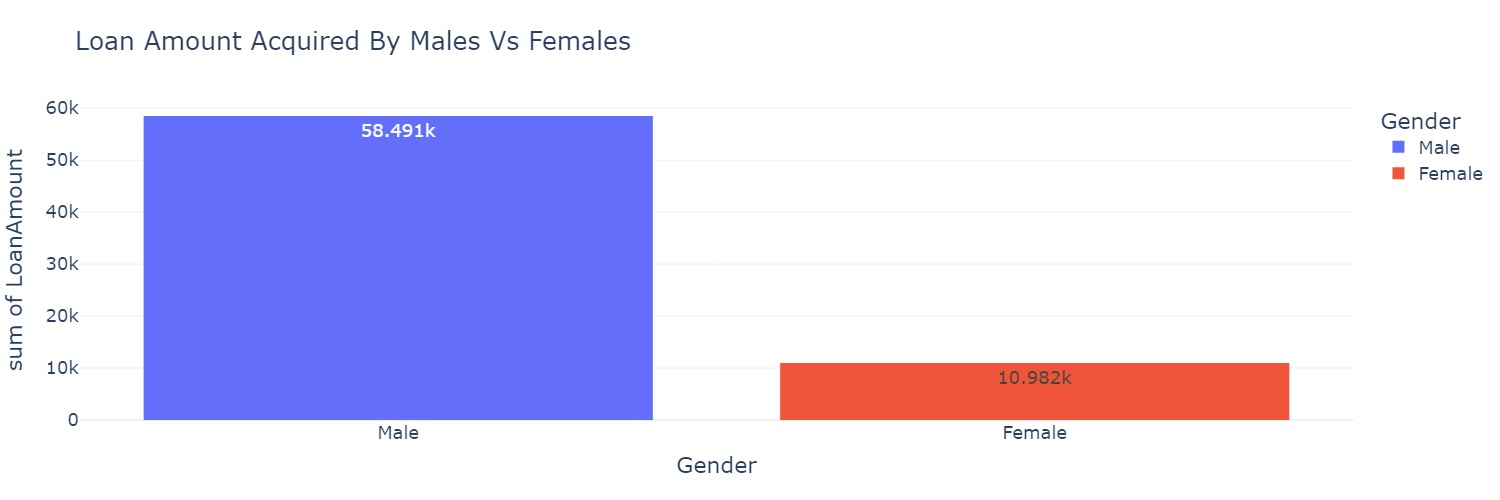

394
86


In [38]:
print("Variance of Males loan amount is" f" {statistics.variance(dfgendermale['LoanAmount'])}")
print("Variance of Females loan amount is" f" {statistics.variance(dfgenderfemale['LoanAmount'])}")

print(stats.ttest_ind(dfgendermale['LoanAmount'], dfgenderfemale['LoanAmount'], equal_var = False))
print("As p value<0.05 we can reject the null hypothesis therefore males do acquire more loan amount than females")
dfgenderdiv
genderfig=px.histogram(dfgenderdiv,x='Gender',y='LoanAmount',color='Gender',template='plotly_white',title="Loan Amount Acquired By Males Vs Females",text_auto=True)
genderfig.update_layout(font=dict(size=18)).show("jpeg",width=1500)
print(len(dfgendermale))
print(len(dfgenderfemale))

But this could be merely due to the fact that male applicants for a loan is way more than female applicants.
- Male applicants are 394 vs Female applicants are merely 86 i.e. **almost 4x lesser than males**

**Therefore we cannot ascertain whether males acquire more loan amount than females**

Do Graduates have a higher chance of loan approval than Non Graduates?

- We'll calculate loan approval percentages for both the categories and will do a comparison to draw a conclusion

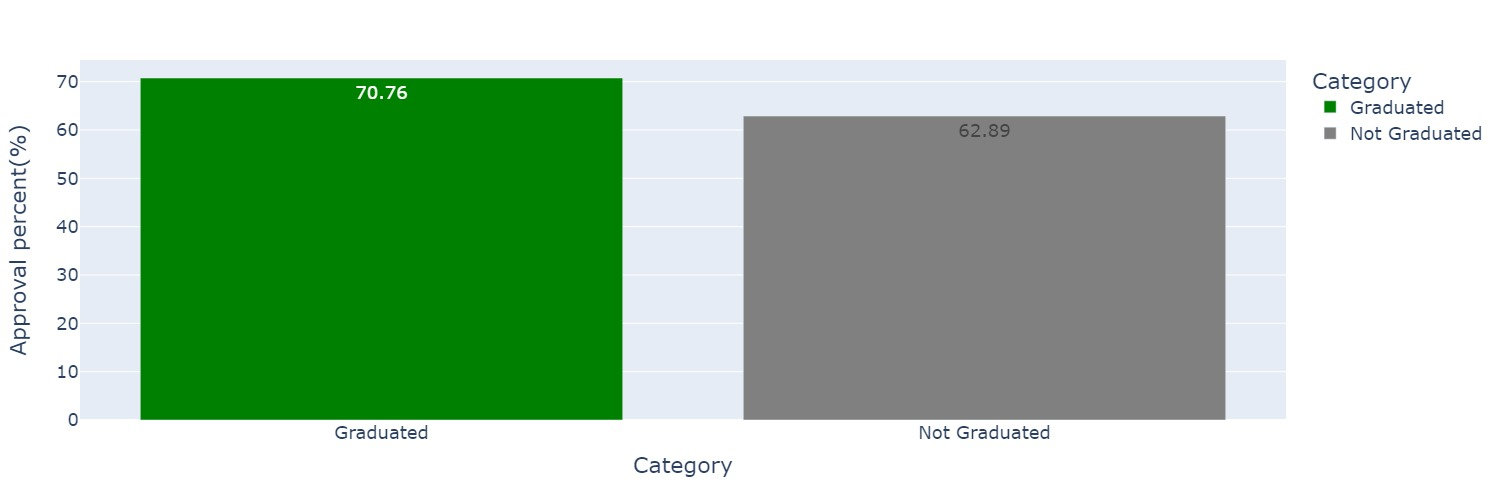

In [39]:
dfgraduate=df.loc[df['Education'] == 'Graduate', ['Education','Loan_Status']]
dfnongraduate=df.loc[df['Education'] == 'Not Graduate', ['Education','Loan_Status']]

#calculating yes and no values for both categories
nongraduatecount=dfnongraduate['Loan_Status'].value_counts()
graduatecount=dfgraduate['Loan_Status'].value_counts()

approvalpercentforgraduates=round(graduatecount[0]/dfgraduate['Loan_Status'].value_counts().sum()*100,2)
approvalpercentfornongraduates=round(nongraduatecount[0]/dfnongraduate['Loan_Status'].value_counts().sum()*100,2)

approvalpercent=pd.DataFrame({'Category':['Graduated','Not Graduated'],'Approval percent(%)':[approvalpercentforgraduates,approvalpercentfornongraduates]})
approvalpercentfig=px.bar(approvalpercent,x='Category',y='Approval percent(%)',text_auto=True,color='Category',color_discrete_sequence=['green','gray'])
approvalpercentfig.update_layout(font=dict(size=18)).show("jpeg",width=1500)







**Loan Approval Percentage in non graduates is marginally less by approximately 8%**

Probability Chances For Loan Approval(Genderwise)(Graduated & Non Graduated Applicants)

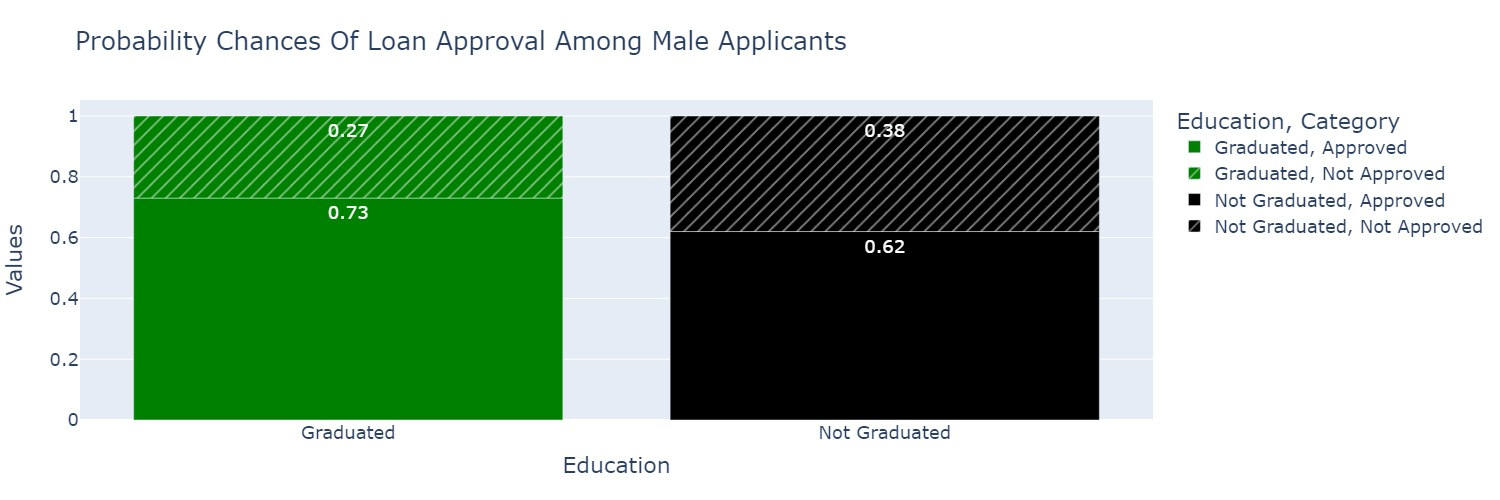

In [40]:
dfgraduategw=df.loc[df['Education'] == 'Graduate', ['Gender','Education','Loan_Status']]
dfnongraduategw=df.loc[df['Education'] == 'Not Graduate', ['Gender','Education','Loan_Status']]

#calculating male probability rates
#males(graduates)

malegraduateprob=dfgraduategw.loc[dfgraduategw['Gender'] == 'Male', ['Loan_Status','Education']]
malegradtotal=malegraduateprob['Loan_Status'].count()
#yes chances
malegraduateprobyes=malegraduateprob.loc[malegraduateprob['Loan_Status']=='Y'].count()
#no chances
malegraduateprobno=malegraduateprob.loc[malegraduateprob['Loan_Status']=='N'].count()
#yes chances for male
probyesmale=malegraduateprobyes/malegradtotal
probyesmale=round(probyesmale,2)
#no chances for male
probnomale=malegraduateprobno/malegradtotal
probnomale=round(probnomale,2)

#males(nongraduates)
malenongraduateprob=dfnongraduategw.loc[dfnongraduategw['Gender'] == 'Male', ['Loan_Status','Education']]
malenongradtotal=malenongraduateprob['Loan_Status'].count()
#yes chances
malenongraduateprobyes=malenongraduateprob.loc[malenongraduateprob['Loan_Status']=='Y'].count()
#nochances
malenongraduateprobno=malenongraduateprob.loc[malenongraduateprob['Loan_Status']=='N'].count()
#yes chances for male
probyesmalenongrad=malenongraduateprobyes/malenongradtotal
probyesmalenongrad=round(probyesmalenongrad,2)
#no chances for male
probnomalenongrad=malenongraduateprobno/malenongradtotal
probnomalenongrad=round(probnomalenongrad,2)

#malescombineddf
mcombined=pd.DataFrame({'Category':['Approved','Not Approved','Approved','Not Approved'],'Values':[probyesmale[0],probnomale[0],probyesmalenongrad[0],probnomalenongrad[0]],'Education':['Graduated','Graduated','Not Graduated','Not Graduated']})


#female(graduates)
femalegraduateprob=dfgraduategw.loc[dfgraduategw['Gender'] == 'Female', ['Loan_Status']]
femalegradtotal=femalegraduateprob['Loan_Status'].count()
#yes chances
femalegraduateprobyes=femalegraduateprob.loc[femalegraduateprob['Loan_Status']=='Y'].count()
probyesgradfemale=femalegraduateprobyes/femalegradtotal
probyesgradfemale=round(probyesgradfemale,2)
#no chances
femalegraduateprobno=femalegraduateprob.loc[femalegraduateprob['Loan_Status']=='N'].count()
probnogradfemale=femalegraduateprobno/femalegradtotal
probnogradfemale=round(probnogradfemale,2)

#female(nongraduates)
femalenongraduateprob=dfnongraduategw.loc[dfnongraduategw['Gender'] == 'Female', ['Loan_Status']]
femalenongradotal=femalenongraduateprob['Loan_Status'].count()
#yes chances
femalenongraduateprobyes=femalenongraduateprob.loc[femalenongraduateprob['Loan_Status']=='Y'].count()
probyesnongradfemale=femalenongraduateprobyes/femalenongradotal
probyesnongradfemale=round(probyesnongradfemale,2)
#no chances
femalenongraduateprobno=femalenongraduateprob.loc[femalenongraduateprob['Loan_Status']=='N'].count()
probnonongradfemale=femalenongraduateprobno/femalenongradotal
probnonongradfemale=round(probnonongradfemale,2)

#femalescombineddf
fcombined=pd.DataFrame({'Category':['Approved','Not Approved','Approved','Not Approved'],'Values':[probyesgradfemale[0],probnogradfemale[0],probyesnongradfemale[0],probnonongradfemale[0]],'Education':['Graduated','Graduated','Not Graduated','Not Graduated']})

fig = px.bar(mcombined,x='Education',y='Values',color='Education',pattern_shape='Category',title="Probability Chances Of Loan Approval Among Male Applicants",text_auto=True,color_discrete_map={'Graduated':'green','Not Graduated':'Black'})
fig.update_layout(font=dict(size=18)).show("jpeg",width=1500)


**Probability scores are between the range of 0 to 1**
- Graduated Males have a **0.73 i.e. 73% chance** of their loans getting which is **11% more than** Non Graduates chances of getting loan approved which is **0.62** i.e. 62%

- Non Graduated Males have a **0.38 i.e. 38%** chances of their loan not being approved which is significantly higher than chances of graduated males loan being disapproved which stands to **0.27 i.e. 27%**

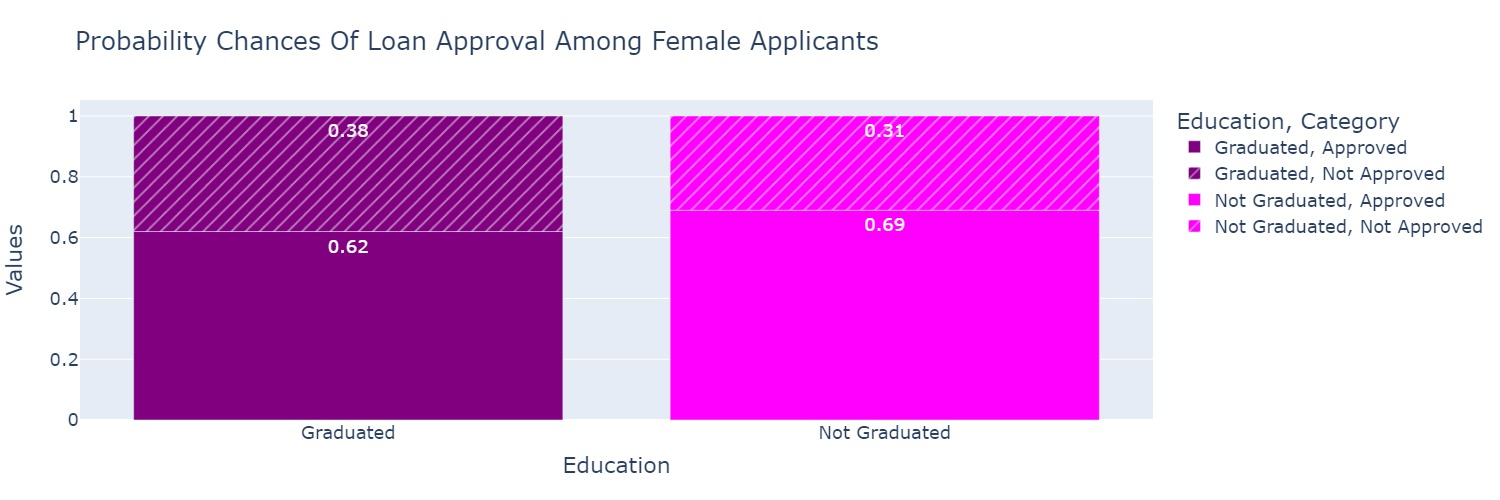

In [41]:
fig = px.bar(fcombined,x='Education',y='Values',color='Education',pattern_shape='Category',title="Probability Chances Of Loan Approval Among Female Applicants",text_auto=True,color_discrete_map={'Graduated':'purple','Not Graduated':'magenta'})
fig.update_layout(font=dict(size=18)).show("jpeg",width=1500)


**Probability scores are between 0 and 1**
- Female Graduates suprisingly have a lower chances of loan getting approved of **0.62 i.e. 62%** whereas Non Graduates have a higher chance of getting loan approved of 0.69 i.e. 69%

- Female Graduates face higher risk of their loans being disapproved of p score **0.38 i.e. 38%** whereas Non Graduates have lower chances of loans being disapproved (0.31 i.e 31%)

Applicant Income Distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3458495793.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\3458495793.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



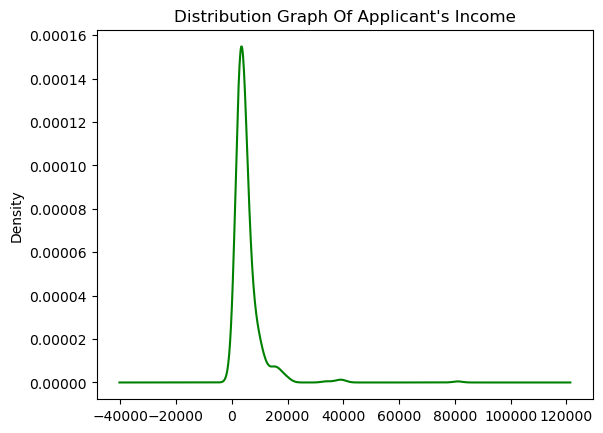

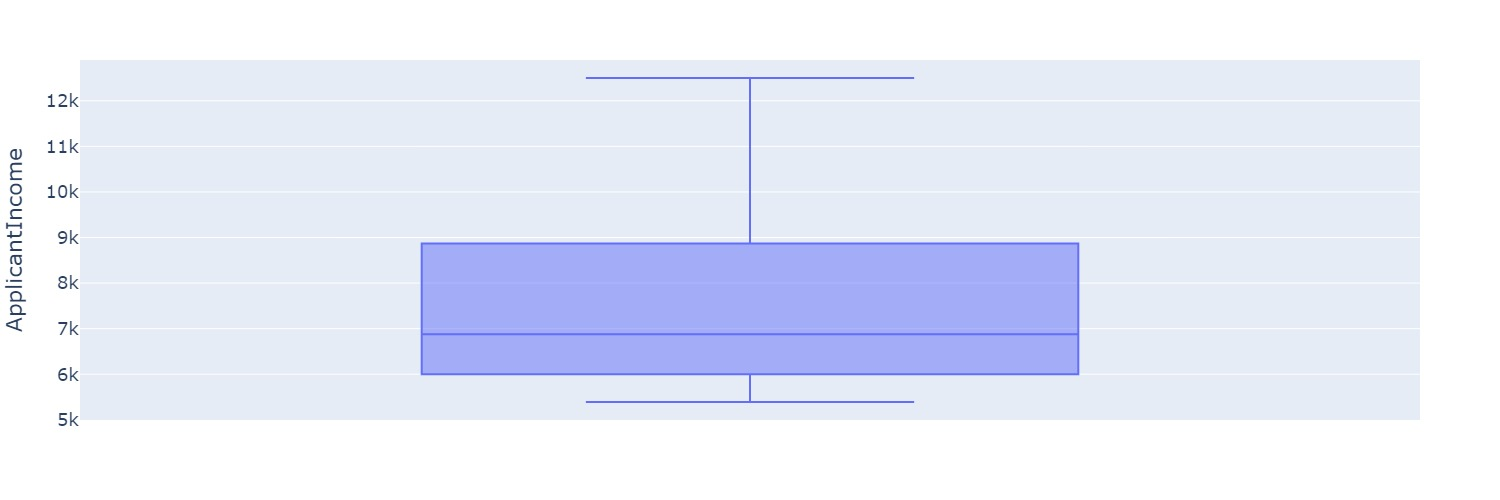

     ApplicantIncome Loan_Status  zscore  percentile
4               6000           Y    0.11       54.38
5               5417           Y    0.01       50.40
20              7660           N    0.41       65.91
21              5955           Y    0.10       53.98
25              9560           Y    0.74       77.04
..               ...         ...     ...         ...
599             5780           Y    0.07       52.79
602             5703           Y    0.06       52.39
604            12000           Y    1.17       87.90
611             8072           Y    0.48       68.44
612             7583           Y    0.39       65.17

[117 rows x 4 columns]


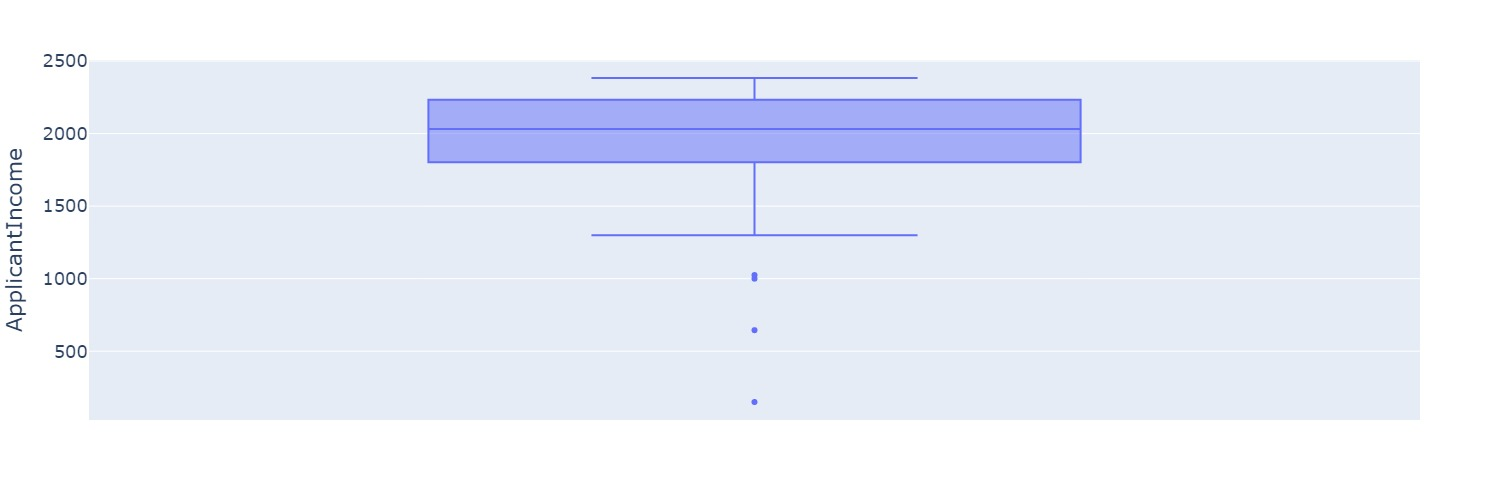

     ApplicantIncome Loan_Status  zscore  percentile
6               2333           Y   -0.54       29.46
13              1853           N   -0.62       26.76
14              1299           Y   -0.72       23.58
28              1442           N   -0.69       24.51
41              1800           Y   -0.63       26.43
..               ...         ...     ...         ...
568             2378           N   -0.53       29.81
578             1782           Y   -0.63       26.43
581             1836           N   -0.62       26.76
586             2297           Y   -0.54       29.46
587             2165           Y   -0.57       28.43

[63 rows x 4 columns]


In [42]:
#z score analysis distribution of applicant income
dfincome=df[['ApplicantIncome','Loan_Status']]
zscore=stats.zscore(df['ApplicantIncome'])
dfincome['zscore']=round(zscore,2)
def zptile(z_score):
    return .5 * (math.erf(z_score / 2 ** .5) + 1)
dfincome['percentile']=round(dfincome['zscore'].apply(zptile)*100,2)
dfincome['ApplicantIncome'].plot.density(color="green")
plt.title("Distribution Graph Of Applicant's Income")
plt.show()

#plot the zscore distribution
#income range of 50-90% applicants
gtfiftylt90=dfincome.loc[(dfincome['percentile']>=50.00)]
gtfiftylt90=gtfiftylt90.loc[(dfincome['percentile']<=90.00)]
gtfiftylt90fig=px.box(gtfiftylt90,y='ApplicantIncome')
gtfiftylt90fig.update_layout(font=dict(size=18)).show("jpeg",width=1500)
print(gtfiftylt90)
#income range of 10-30% applicants
gt10lt30=dfincome.loc[(dfincome['percentile']>=10.00)]
gt10lt30=dfincome.loc[(dfincome['percentile']<=30.00)]
gt10lt30fig=px.box(gt10lt30,y='ApplicantIncome')
gt10lt30fig.update_layout(font=dict(size=18)).show("jpeg",width=1500)
print(gt10lt30)

Which Income Groups have the highest approval and rejection rates

Y    59
N    27
Name: Loan_Status, dtype: int64
Y    233
N     99
Name: Loan_Status, dtype: int64
Y    42
N    18
Name: Loan_Status, dtype: int64


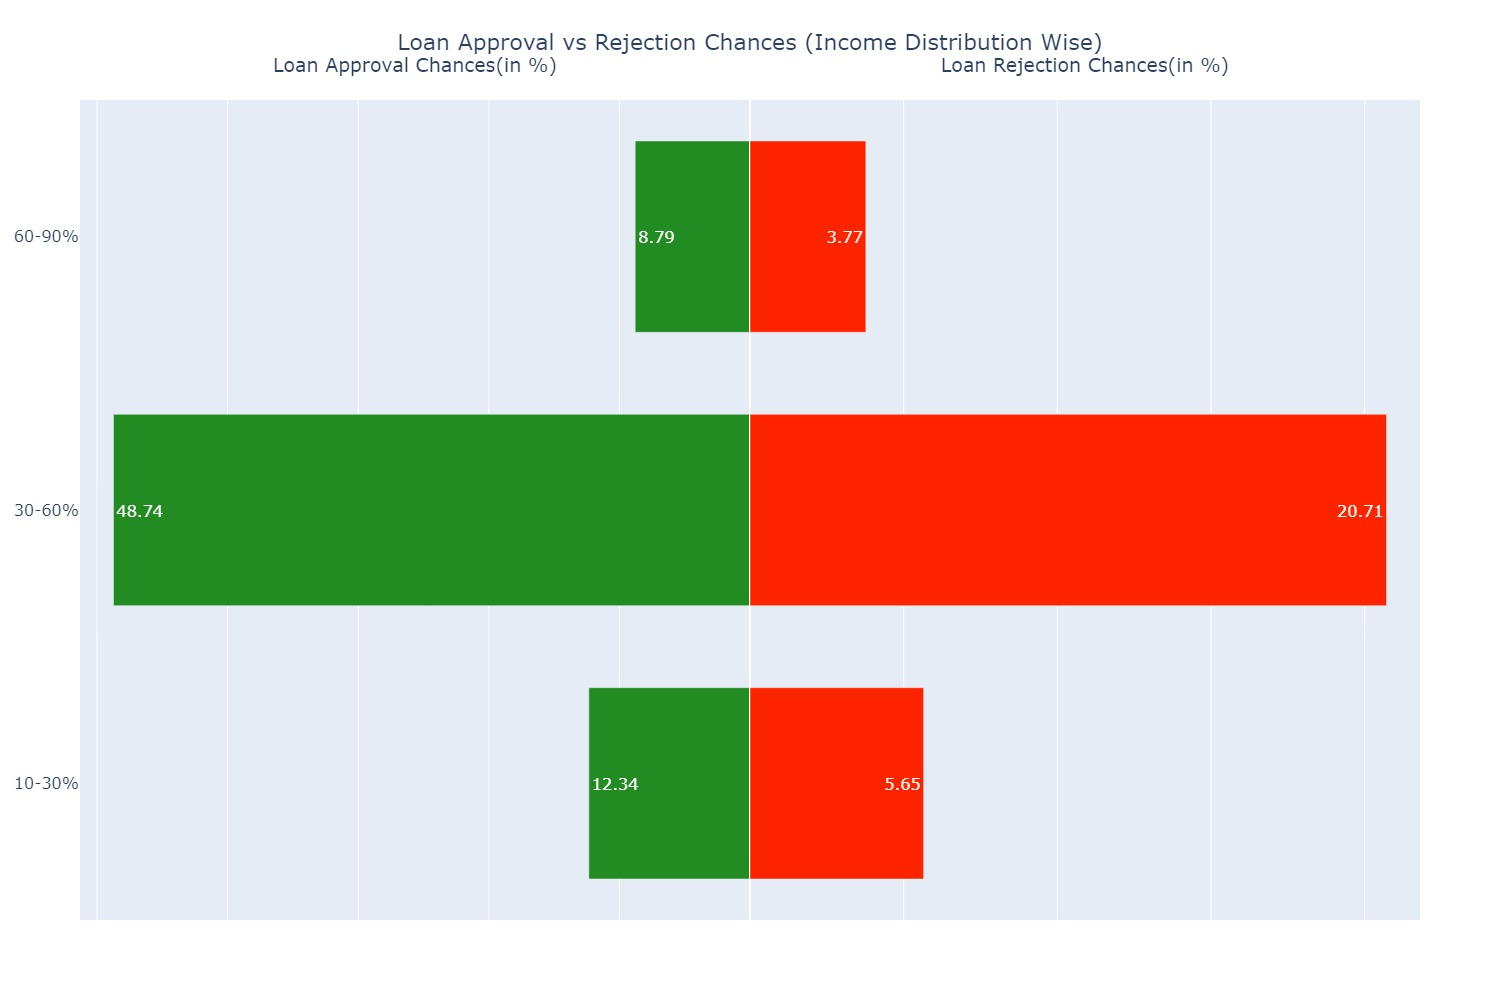

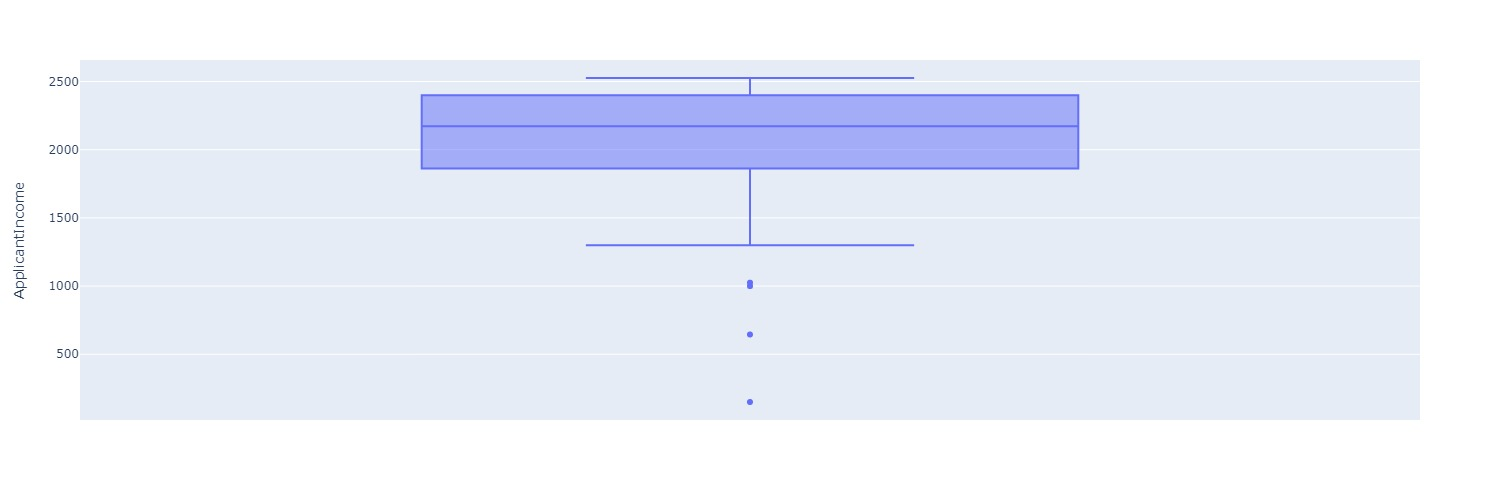

In [43]:
#10-30%
gt10lt30=dfincome.loc[(dfincome['percentile']>10.00)]
gt10lt30=gt10lt30.loc[(dfincome['percentile']<31.00)]
#30-60%
gt30lt60=dfincome.loc[(dfincome['percentile']>30.00)]
gt30lt60=gt30lt60.loc[(dfincome['percentile']<61.00)]
#60-90%
gt60lt90=dfincome.loc[(dfincome['percentile']>=60.00)]
gt60lt90=gt60lt90.loc[(dfincome['percentile']<90.00)]
print(gt10lt30['Loan_Status'].value_counts())
print(gt30lt60['Loan_Status'].value_counts())
print(gt60lt90['Loan_Status'].value_counts())
gtltsum=gt10lt30['Loan_Status'].count()+gt30lt60['Loan_Status'].count()+gt60lt90['Loan_Status'].count()
gtltsum #sum of all category distributions i.e total no of values availaible

#calculating probable chances for each category

#10-30%
gt1030probyes=round(gt10lt30['Loan_Status'].value_counts()[0]/gtltsum*100,2)
gt1030probno=round(gt10lt30['Loan_Status'].value_counts()[1]/gtltsum*100,2)
#30-60%
gt3060probyes=round(gt30lt60['Loan_Status'].value_counts()[0]/gtltsum*100,2)
gt3060probno=round(gt30lt60['Loan_Status'].value_counts()[1]/gtltsum*100,2)
#60-90%
gt6090probyes=round(gt60lt90['Loan_Status'].value_counts()[0]/gtltsum*100,2)
gt6090probno=round(gt60lt90['Loan_Status'].value_counts()[1]/gtltsum*100,2)

gtltcombineddf=pd.DataFrame({'Categories':['10-30%','30-60%','60-90%'],'Yes':[gt1030probyes,gt3060probyes,gt6090probyes],'No':[gt1030probno,gt3060probno,gt6090probno]})
gtltcombinedfig=px.line(gtltcombineddf,x='Categories',y='Yes',template='plotly_white').update_layout(showlegend=True)
gtltcombinedfig.add_scatter(x=gtltcombineddf['Categories'],y=gtltcombineddf['No'],mode='lines',name='No')
# gtltcombinedfig.show()






fig1 = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=False,
                    shared_yaxes=True, horizontal_spacing=0)

fig1.append_trace(go.Bar(x=gtltcombineddf['Yes'],
                     y=gtltcombineddf['Categories'], 
                     text=gtltcombineddf['Yes'], #Display the numbers with thousands separators in hover-over tooltip 
                     textposition='inside',
                     orientation='h', 
                     width=0.7, 
                     showlegend=False, 
                     marker_color='#228b22'), 
                     1, 1)

fig1.append_trace(go.Bar(x=gtltcombineddf['No'],
                     y=gtltcombineddf['Categories'], 
                     text=gtltcombineddf['No'],
                     textposition='inside',
                     orientation='h', 
                     width=0.7, 
                     showlegend=False, 
                     marker_color='#FF2400'), 
                     1, 2)


fig1.update_xaxes(showticklabels=False,title_text='Loan Approval Chances(in %)', row=1, col=1, autorange='reversed')
fig1.update_xaxes(showticklabels=False,title_text="Loan Rejection Chances(in %)", row=1, col=2)
fig1.update_layout(title_text="Loan Approval vs Rejection Chances (Income Distribution Wise)", 
                  width=1200, 
                  height=1000,
                  title_x=0.5,
                  xaxis1={'side': 'top'},
                  xaxis2={'side': 'top'},font=dict(size=16))
fig1.show("jpeg",width=1500)

#boxplot for 30-60% to visualise the income distribution(this group has the most approval and rejection chances)
bplot=px.box(gt10lt30,y='ApplicantIncome')
bplot.show("jpeg",width=1500)


Loan Applicant Location Distribution(Rural/Urban/SemiUrban)

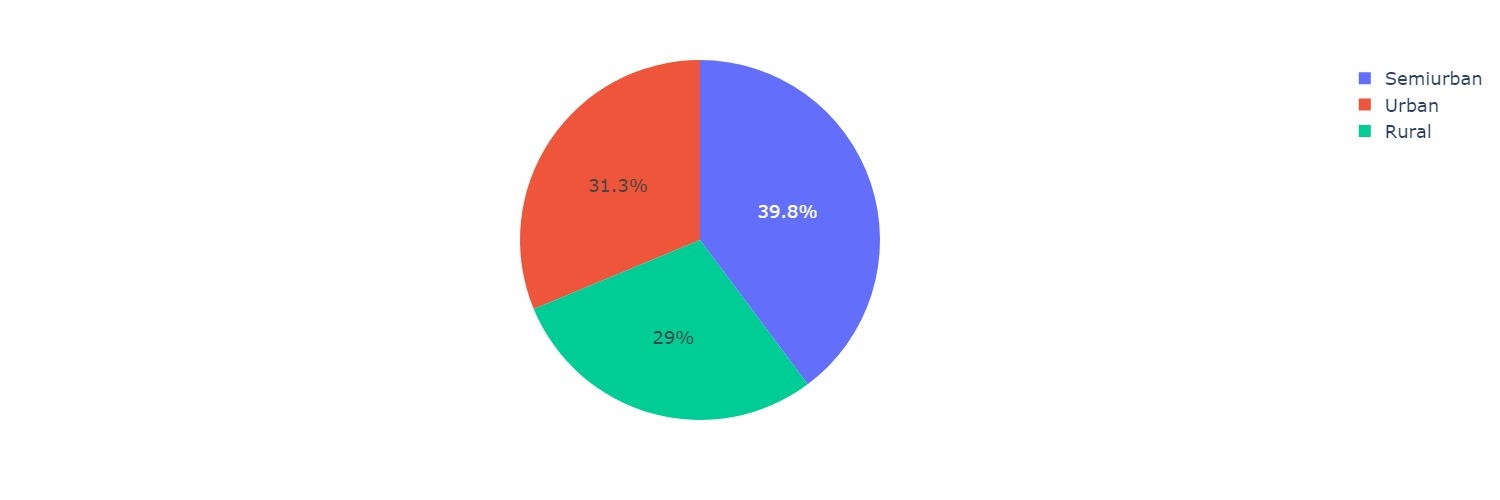

In [44]:
dfarea=pd.DataFrame({'Property_Area':['Semiurban','Urban','Rural'],'Values':[df[['Property_Area']].value_counts()[0],df[['Property_Area']].value_counts()[1],df[['Property_Area']].value_counts()[2]]})
dfareafig=px.pie(dfarea,values='Values',names='Property_Area')
dfareafig.update_layout(font=dict(size=18)).show("jpeg",width=1500)

#focus on semiurban population

Loan Amount Distribution And Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\1763971846.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_13552\1763971846.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     LoanAmount    zscore  percentile
5         267.0  1.520245       93.58
9         349.0  2.539838       99.45
21        315.0  2.117080       98.29
34        320.0  2.179250       98.53
54        286.0  1.756492       96.05
65        258.0  1.408339       92.05
67        312.0  2.079778       98.12
106       225.0  0.998015       84.09
108       216.0  0.886108       81.22
119       259.0  1.420773       92.23
135       290.0  1.806228       96.46
138       242.0  1.209394       88.67
148       225.0  0.998015       84.09
152       244.0  1.234262       89.14
155       600.0  5.660787      100.00
159       255.0  1.371036       91.48
161       275.0  1.619718       94.74
177       495.0  4.355211      100.00
183       260.0  1.433207       92.41
210       214.0  0.861240       80.54
212       240.0  1.184525       88.19
233       280.0  1.681888       95.37
253       279.0  1.669454       95.25
255       255.0  1.371036       91.48
258       304.0  1.980305       97.62
278       43

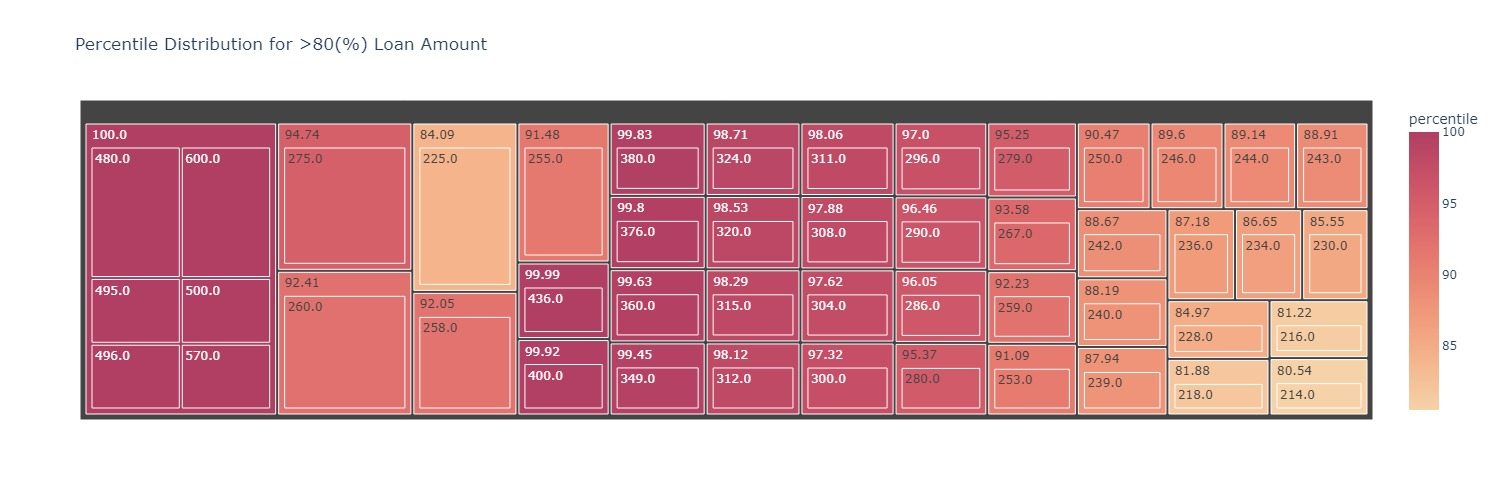

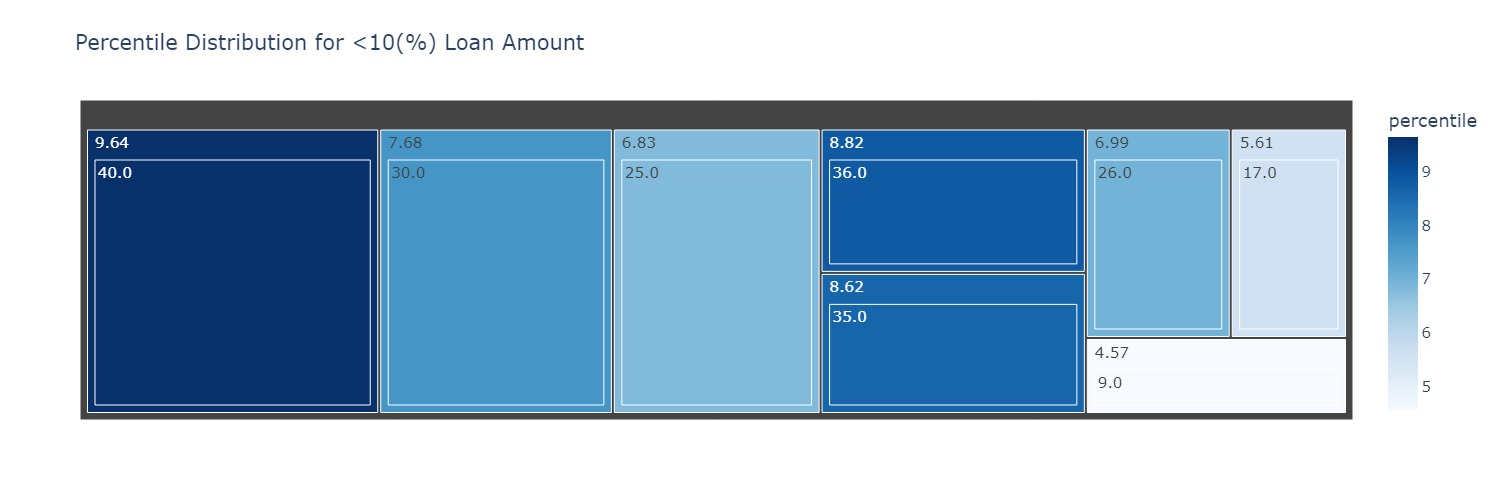

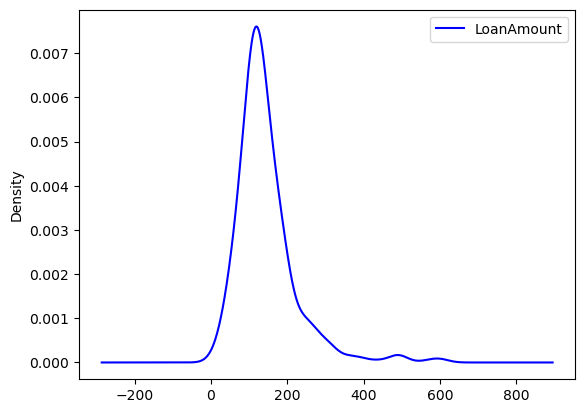

In [46]:
dfloan=df[['LoanAmount']]
dfloan.plot.density(color="blue")
dfloan['zscore']=stats.zscore(df[['LoanAmount']])
def zptile(z_score):
    return .5 * (math.erf(z_score / 2 ** .5) + 1)
dfloan['percentile']=round(dfloan['zscore'].apply(zptile)*100,2)

#What is the most common range of amount applied for loans(>80%)
dfloangt80=dfloan.loc[(dfloan['percentile']>80.00)]
#What is the least common range of amount applied for loans(<10%)
dfloanlt10=dfloan.loc[(dfloan['percentile']<10.00)]
print(dfloangt80)

#diagrammatic represenation of >80% and <10% needs to be done(might use a treemap)
#>80%
fig=px.treemap(dfloangt80,values='percentile',path=['percentile','LoanAmount'],color='percentile',color_continuous_scale=px.colors.sequential.Redor,title='Percentile Distribution for >80(%) Loan Amount')
fig.show("jpeg",width=1500)
#<10%
fig=px.treemap(dfloanlt10,values='percentile',path=['percentile','LoanAmount'],color='percentile',color_continuous_scale=px.colors.sequential.Blues,title='Percentile Distribution for <10(%) Loan Amount')
fig.update_layout(font=dict(size=15)).show("jpeg",width=1500)

Dependent vs Non Dependent Analysis

In [12]:
zerodependent=df.loc[df['Dependents'] == '0', ['Dependents','LoanAmount','Loan_Status']]
pluszerodependent=df.loc[df['Dependents'] > '0', ['Dependents','LoanAmount','Loan_Status']]
pluszerodependent

,Dependents,LoanAmount,Loan_Status
1,1,128.0,N
5,2,267.0,Y
7,3+,158.0,N
8,2,168.0,Y
9,1,349.0,N
...,...,...,...
606,1,173.0,Y
607,2,157.0,Y
610,3+,40.0,Y
611,1,253.0,Y


Do Dependents apply for more loan amount on an average when compared to average loan amount applied by all the loan applicants?

Conducting a hypothesis test to get an answer
- Null Hypothesis: Average of Loan Amount applied by dependents<=Average Loan Amount applied by total customers 
- Alternative Hypothesis: Average of Loan Amount applied by dependents>Average Loan Amount applied by total customers
- critical value is assumed to be 0.05 (1.645 in zscore)

In [13]:
meannull=df['LoanAmount'].mean()
meanalt=pluszerodependent['LoanAmount'].astype(float).mean()
stdnull=statistics.stdev(df['LoanAmount'])
samplepopulation=pluszerodependent['LoanAmount'].count()

ztest=(meannull-meanalt)/(stdnull/math.sqrt(samplepopulation))

ztest


-2.9515153792242974

As z test score is lesser than z score value therefore we can reject the alternative hypothesis and conclude that:- 
- Average of Loan Amount Applied By Dependents<Average of Loan Amount Applied By Total Customers

Do Non Dependents apply for lesser loan amount on an average when compared to average loan amount applied by all the loan applicants?

Conducting a hypothesis test to get an answer
- Null Hypothesis: Average of Loan Amount applied by Non Dependents>=Average Loan Amount applied by total customers 
- Alternative Hypothesis: Average of Loan Amount applied by Non Dependents<Average Loan Amount applied by total customers
- critical value is assumed to be 0.05 (1.645 in zscore)

In [14]:
meannull=df['LoanAmount'].mean()
meanalt=zerodependent['LoanAmount'].astype(float).mean()
stdnull=statistics.stdev(df['LoanAmount'])
samplepopulation=zerodependent['LoanAmount'].count()

ztest=(meannull-meanalt)/(stdnull/math.sqrt(samplepopulation))

ztest

2.559195004138112

As z test score is greater than z score value therefore we can reject the null hypothesis and conclude that:- 
- Average of Loan Amount Applied By Non Dependents<Average of Loan Amount Applied By Total Customers

Dependant v/s Non Dependant Chances/Rejection Rates Comparison

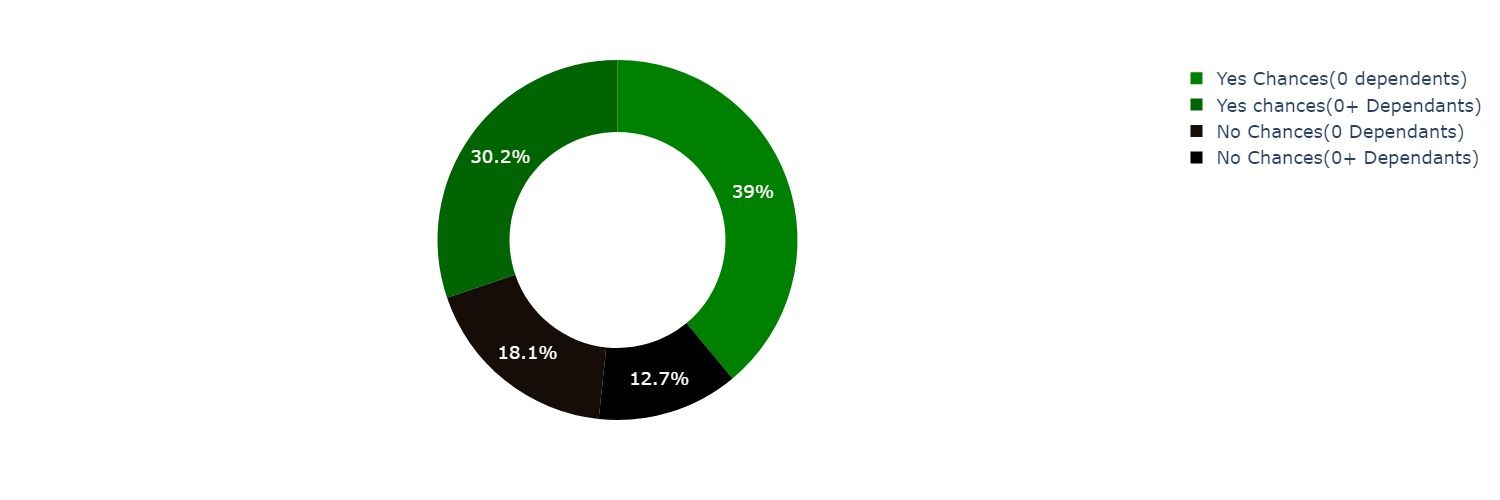

,Category,Rejection Chances
0,No Chances(0 Dependants),0.181250
1,No Chances(0+ Dependants),0.127083
2,Yes Chances(0 dependents),0.389583
3,Yes chances(0+ Dependants),0.302083


In [47]:
zerodependent['Loan_Status'].value_counts()
total=zerodependent['Loan_Status'].value_counts()[0]+zerodependent['Loan_Status'].value_counts()[1]+pluszerodependent['Loan_Status'].value_counts()[0]+pluszerodependent['Loan_Status'].value_counts()[1]
nochanceszerodep=zerodependent['Loan_Status'].value_counts()[1]/total
nochanceszeroplus=pluszerodependent['Loan_Status'].value_counts()[1]/total
yeschanceszerodep=zerodependent['Loan_Status'].value_counts()[0]/total
yeschanceszeroplus=pluszerodependent['Loan_Status'].value_counts()[0]/total
nochanceszeroplus
nochancesdf=pd.DataFrame({'Category':['No Chances(0 Dependants)','No Chances(0+ Dependants)','Yes Chances(0 dependents)','Yes chances(0+ Dependants)'],'Rejection Chances':[nochanceszerodep,nochanceszeroplus,yeschanceszerodep,yeschanceszeroplus]})
fig=px.pie(nochancesdf,values='Rejection Chances',names='Category',color='Category',hole=.6,color_discrete_map={'No Chances(0 Dependants)':'#160d08','Yes Chances(0 dependents)':'green','No Chances(0+ Dependants)':'black','Yes chances(0+ Dependants)':'darkgreen'})
fig.update_layout(font=dict(size=18)).show("jpeg",width=1500)
nochancesdf

- Dependants(0+) have a lower risk of rejection than non dependants(0) but at the same time non dependants have a higher chance of approval
